In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
F_data= pd.read_csv('Fraud_check.csv')
F_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
F_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
F_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
#the below code is finding good and risky category it can be done with replace function also.
x = F_data['Taxable.Income']
def risky(x):
    status=[]
    for i in x:
        if i<=30000:
            status.append('risky')
        elif i >30000:
            status.append('Good') 
    return status

fraud_status = pd.DataFrame(risky(x),columns=['status'])
fraud_status

,status
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [6]:
F_data['Status']= fraud_status

In [7]:
fraud_status.status.value_counts()

status
Good     476
risky    124
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Status'>

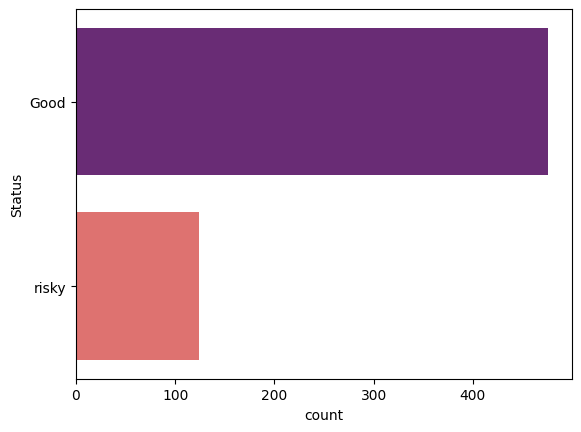

In [8]:
sns.countplot(F_data['Status'],palette='magma')

In [9]:
le= LabelEncoder()
X= F_data.iloc[:,0:6]
Y= F_data.iloc[:,-1]
X['Undergrad'] = le.fit_transform(X['Undergrad'])
X['Marital.Status'] = le.fit_transform(X['Marital.Status'])
X['Urban'] = le.fit_transform(X['Urban'])

In [10]:
X.drop('Taxable.Income',axis=1,inplace=True)

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [12]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=8)

In [13]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

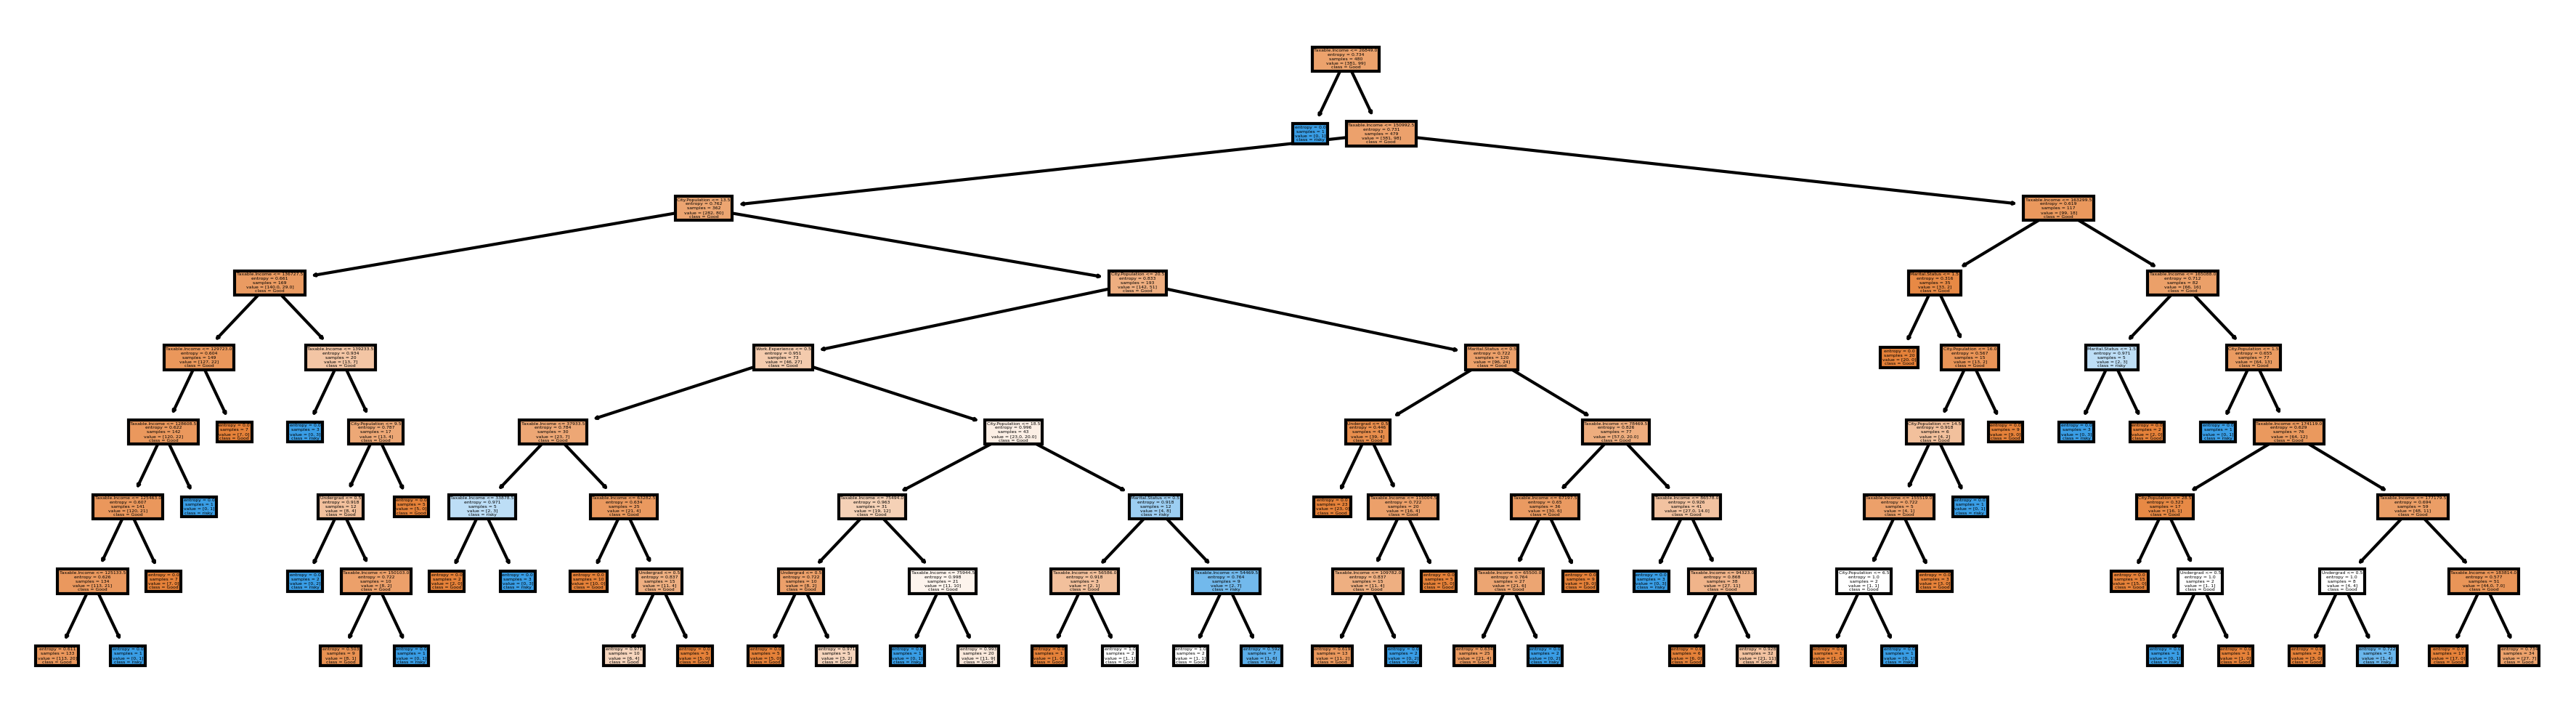

In [14]:
features=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
classes=['Good','risky']
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,4), dpi=300)
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True);

In [15]:
pred_on_train_data=model.predict(X_train)

In [16]:
pd.Series(pred_on_train_data).value_counts()

Good     441
risky     39
Name: count, dtype: int64

In [17]:
pd.crosstab(Y_train,pred_on_train_data)

col_0,Good,risky
Status,,
Good,379,2
risky,62,37


In [18]:
np.mean(pred_on_train_data==Y_train)

0.8666666666666667

In [19]:
pred_on_test_data=model.predict(X_test)
pd.Series(pred_on_test_data).value_counts()

Good     109
risky     11
Name: count, dtype: int64

In [20]:
pred_on_test_data=model.predict(X_test)
pd.Series(pred_on_test_data).value_counts()

Good     109
risky     11
Name: count, dtype: int64

In [21]:
pd.crosstab(Y_test,pred_on_test_data)

col_0,Good,risky
Status,,
Good,85,10
risky,24,1


In [22]:
np.mean(Y_test==pred_on_test_data)

0.7166666666666667

In [23]:
# Gini index
model1= DecisionTreeClassifier(criterion='gini',max_depth=6)

In [24]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6)

In [25]:
preds=model1.predict(X_test)

In [26]:
pd.Series(preds).value_counts()

Good     116
risky      4
Name: count, dtype: int64

In [27]:
pd.crosstab(Y_test,preds)

col_0,Good,risky
Status,,
Good,92,3
risky,24,1


In [28]:
np.mean(Y_test==preds)

0.775

In [29]:
preds1=model1.predict(X_train)
pd.Series(preds1).value_counts()

Good     465
risky     15
Name: count, dtype: int64

In [30]:
pd.crosstab(preds1,Y_train)

Status,Good,risky
row_0,,
Good,380,85
risky,1,14


In [31]:
np.mean(preds1==Y_train)

0.8208333333333333

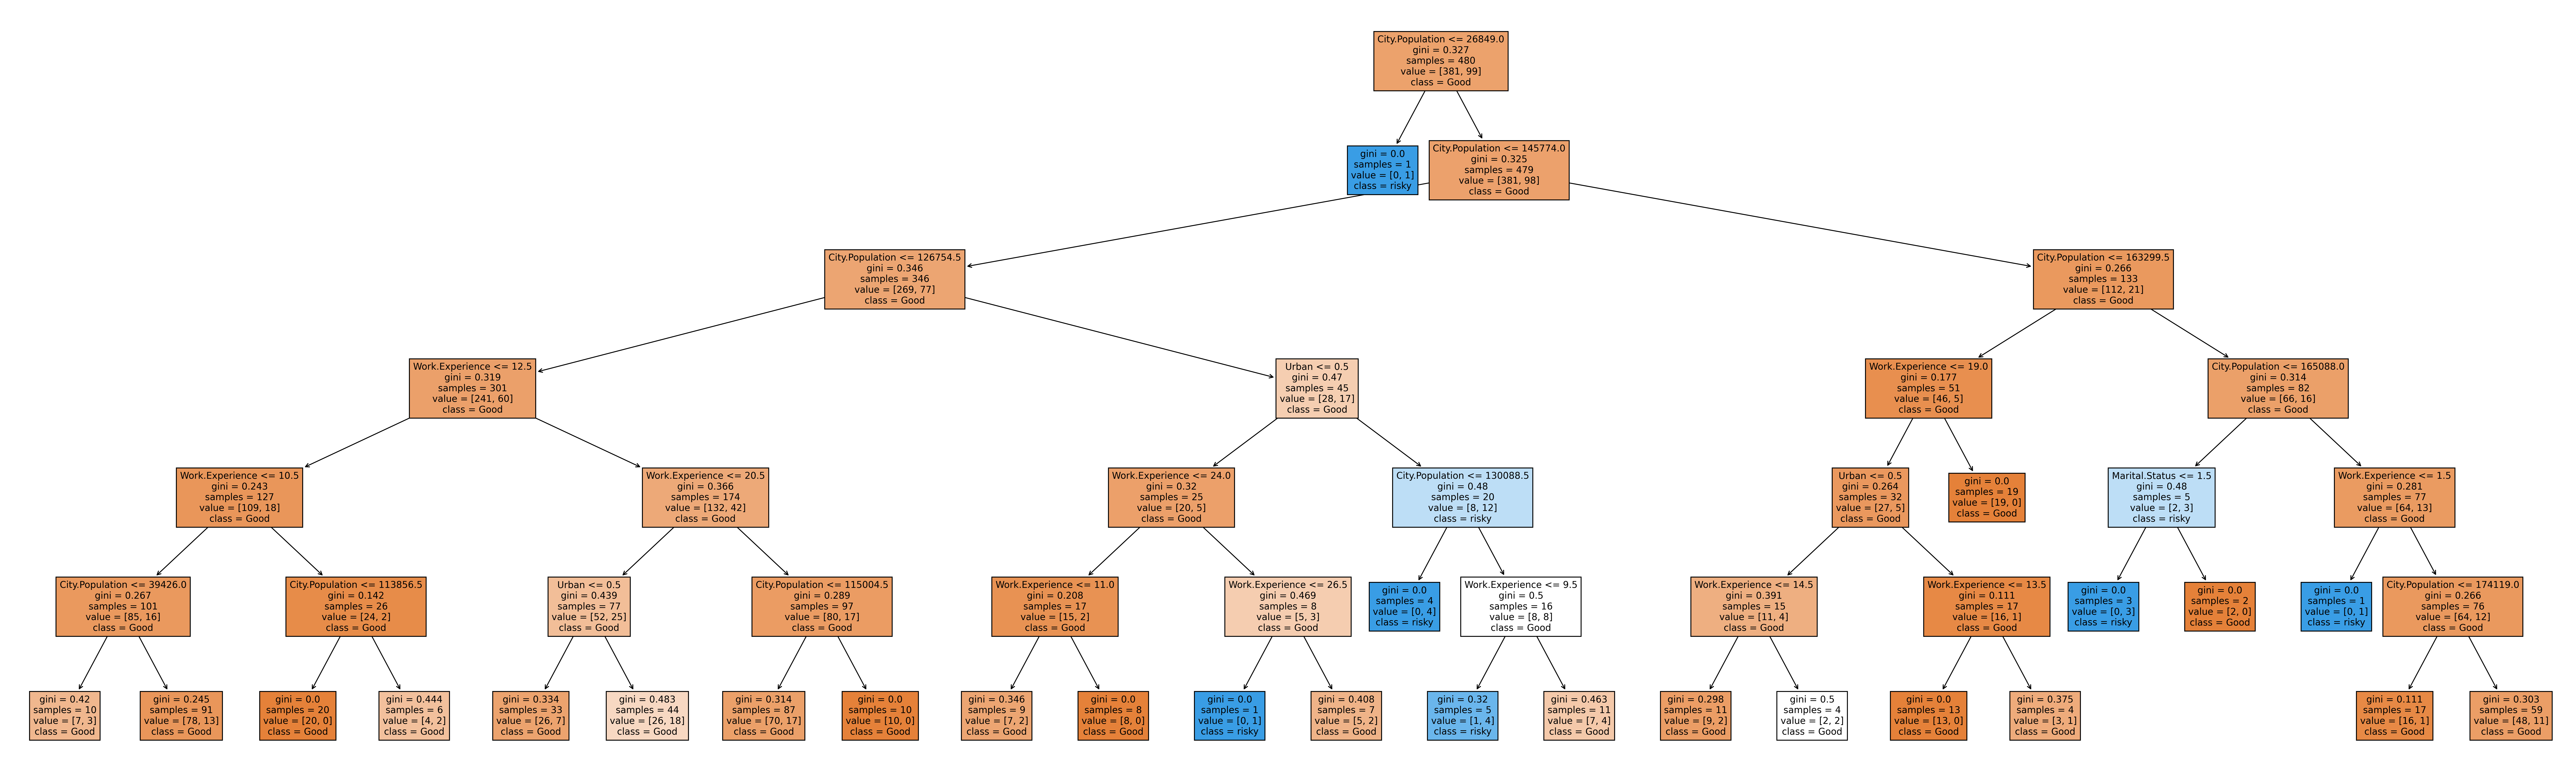

In [32]:
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,15), dpi=300)
tree.plot_tree(model1,filled=True,feature_names=X_train.columns,class_names=Y_train.unique(),fontsize=10);